# SENTIMENT ANALYSIS

*Notebook version: 1.2402.0601*


<br>
<br>

## Library

Import required library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

from subprocess import check_output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# download punctuation and stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<br>
<br>

## Read Dataset

In [ ]:
!mkdir -p dataset
!wget https://raw.githubusercontent.com/project303/dataset/master/Twitter.csv -P dataset

--2024-02-06 14:22:01--  https://raw.githubusercontent.com/project303/dataset/master/Twitter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413468 (404K) [text/plain]
Saving to: ‘dataset/Twitter.csv’

Twitter.csv         100%[===================>] 403.78K  --.-KB/s    in 0.006s  

2024-02-06 14:22:01 (64.2 MB/s) - ‘dataset/Twitter.csv’ saved [413468/413468]



In [ ]:
!ls dataset

Twitter.csv


In [ ]:
data = pd.read_csv('dataset/Twitter.csv', sep='|')

# Choose the column we will be using
data = data[['text','sentiment']]

<br>
<br>

## Data Exploration

In [ ]:
len(data)

4294

In [ ]:
data.head(5)

,text,sentiment
0,@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,@IndosatCare udah di DM yah,Positif
2,@Telkomsel aku pakai loop kak :),Positif
3,@rikawidjaya04 Terima kasih juga Kak Rika atas...,Positif
4,@ndusell saya simpati tan,Positif


In [ ]:
data.groupby("sentiment").count()

,text
sentiment,
Negatif,1271
Netral,1678
Positif,1345


In [ ]:
pd.set_option('display.max_colwidth', None)
data.head(5)

,text,sentiment
0,@IndosatCare iya nomernya masih itu. Mksh.,Positif
1,@IndosatCare udah di DM yah,Positif
2,@Telkomsel aku pakai loop kak :),Positif
3,@rikawidjaya04 Terima kasih juga Kak Rika atas kepercayaannya menggunakan Indosat Ooredoo. Semoga hari ini menyenangkan. Have a nice day :),Positif
4,@ndusell saya simpati tan,Positif


In [ ]:
data[(data.sentiment == 'Negatif')].head(10)

,text,sentiment
940,"@indosatcare udeh berkali2 padahal min dicek mulu dari tadi , tapi tetep aje gabisa .",Negatif
941,Ada gangguan apa sama indosat ko gak bisa2 @IndosatCare,Negatif
942,@Telkomsel iPhone 5C. Saya udah uninstall dan install lagi tapi tetep aja gitu,Negatif
943,@Telkomsel tolong di cek dan di perbaiki,Negatif
944,@Telkomsel tpi mash ajj ttp kadng suka SoS MULU,Negatif
945,@Telkomsel @ jaringan dn sinyalmu lelet,Negatif
946,Pemberitahuan kayak gini gak bisa di non-aktifkan? Ganggu bgt soalnya. Gak dapet kuota midnight jg @Telkomsel https://t.co/xY4gLfhNQz,Negatif
947,@Telkomsel min knapa sih telkomsel simpati jaringan kecepatan download nya cuma 100kb lebih. biasa nya 1mb an,Negatif
948,@tsel4papua @telkomsel 3G di genyem lg gangguan kah? Lemot banget. Ato mulai di limit bandwidthnya? Karena cuma kampung?,Negatif
949,"@indosatcare cara'y pake apk indosat ooredo,pake *123# pun gk bisa,,iya masih 898",Negatif


In [ ]:
# Bagi dataset menjadi data training dan testing
train, test = train_test_split(data, test_size = 0.2)

In [ ]:
# Hapus sentiment yang netral
train = train[train.sentiment != "Netral"]

# Pisahkan data trining positif dan negatif
train_pos = train[ train['sentiment'] == 'Positif']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negatif']
train_neg = train_neg['text']

In [ ]:
len(train)

2079

In [ ]:
type(train)

pandas.core.series.Series

In [ ]:
train.groupby("sentiment").count()

,text
sentiment,
Negatif,1014
Positif,1065


In [ ]:
train_pos.head(5)

2811    Berlatih KungFu brarti ikut bertanggung jawab bela Negara bukan u saling membunuh sesama sodara IKSPI Densus Independent AntiCapitalism
108                                                                                                       Baik admim yang cantik :-D @Telkomsel
4231                                                                                        Panglima TNI Hadiri Apel Gelar Nasional Bela Negara
2826                                Bisniscom BELA NEGARA Kodam Udayana Prioritaskan Pelajar Bukan Ormas utm source dlvr it utm medium twitter 
3379                                          Ekonomi   Kemenhan  Kebutuhan Bandan Intelijen Pertahanan Sangat Penting  Intelijen pertahanan   
Name: text, dtype: object

In [ ]:
train_neg.head(5)

1850    @Telkomsel @renodeswara  mang itu paket super murah ga sluruh pengguna simpati yaa.  Aneh
1943                       ganti pemimpin juga bakal gitu cita awal kemerdekaan itu sudah hilang 
3985                                                                           Aduh, Narkoba Lagi
3643                                 Ryamizard: Bebaskan 10 WNI, Duterte Pimpin Serang Abu Sayyaf
982                 @indosatcare masih blm ada jg pengumuman #MainDapatAngpao ! katanya hari ini.
Name: text, dtype: object

Draw WordCloud

In [ ]:
#augment the stopwords with nonstandard twitter words
stopwords_set = set(stopwords.words("indonesian"))
stopwords_aug = {"ya","yak","iya","yg","ga","gak","gk","udh","sdh","udah","dah","nih","ini","deh","sih","dong","donk",
                 "sm","knp","utk","yaa","tdk","gini","gitu","bgt","gt","nya","kalo","cb","jg","jgn","gw","ge",
                 "sy","min","mas","mba","mbak","pak","kak","trus","trs","bs","bisa","aja","saja","no",
                 "w","g","gua","gue","emang","emg","wkwk","dr","kau","dg","gimana","apapun","apa",
                 "klo","yah","banget","pake","terus","krn","jadi","jd","mu","ku","si","hehe",
                 "tp","pa","lu","lo","lw","tw","tau","karna","kayak","ky","lg","untuk","tuk","dg","dgn"}
stopwords_all = stopwords_set.union(stopwords_aug)

Positive words


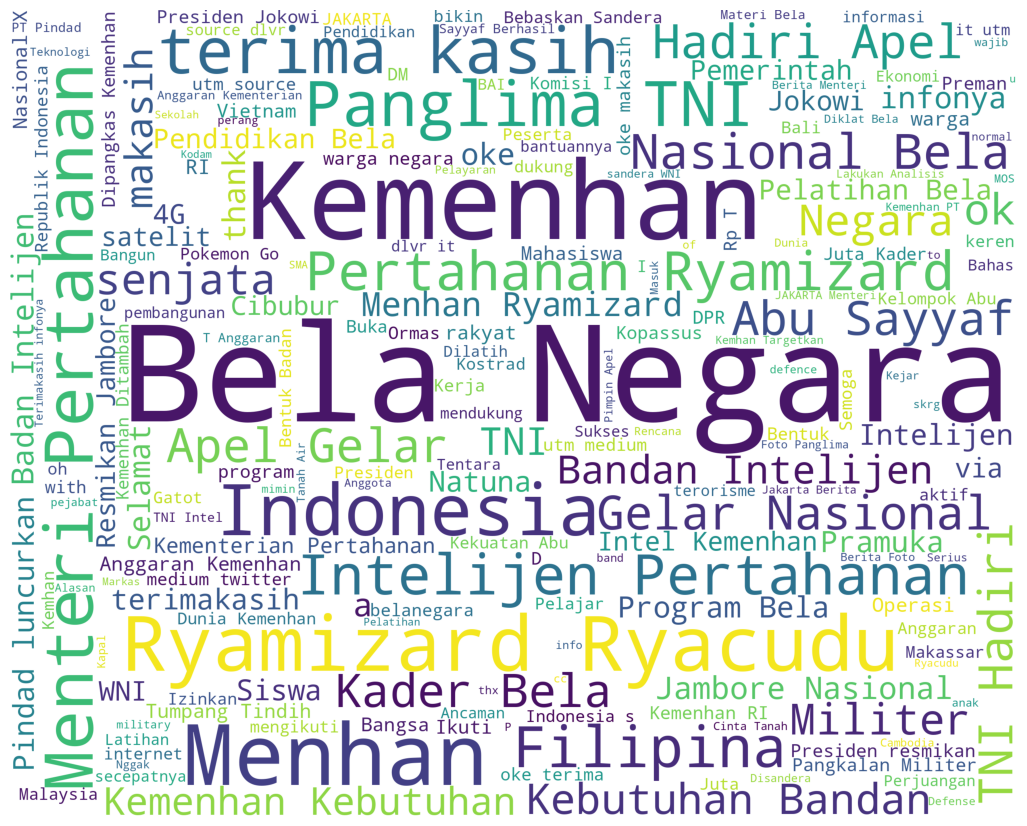

Negative words


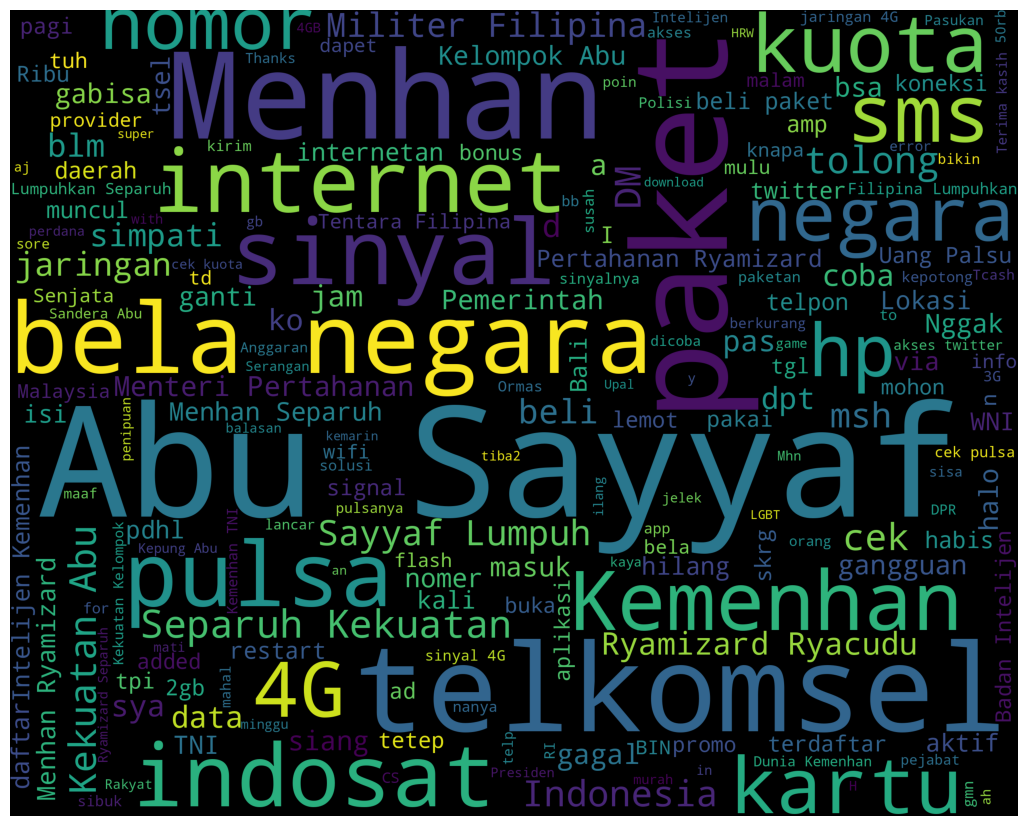

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords_all,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

## Data Preparation

In [ ]:
type(train)

pandas.core.frame.DataFrame

In [ ]:
# tweets adalah data training yang telah dibersihkan
tweets = []

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets.append((words_cleaned,row.sentiment))

In [ ]:
tweets[:5]

[(['mang',
   'itu',
   'paket',
   'super',
   'murah',
   'sluruh',
   'pengguna',
   'simpati',
   'yaa.',
   'aneh'],
  'Negatif'),
 (['berlatih',
   'kungfu',
   'brarti',
   'ikut',
   'bertanggung',
   'jawab',
   'bela',
   'negara',
   'bukan',
   'saling',
   'membunuh',
   'sesama',
   'sodara',
   'ikspi',
   'densus',
   'independent',
   'anticapitalism'],
  'Positif'),
 (['baik', 'admim', 'yang', 'cantik', ':-d'], 'Positif'),
 (['panglima', 'tni', 'hadiri', 'apel', 'gelar', 'nasional', 'bela', 'negara'],
  'Positif'),
 (['bisniscom',
   'bela',
   'negara',
   'kodam',
   'udayana',
   'prioritaskan',
   'pelajar',
   'bukan',
   'ormas',
   'utm',
   'source',
   'dlvr',
   'utm',
   'medium',
   'twitter'],
  'Positif')]

In [ ]:
type(tweets)

list

Feature Extraction

In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


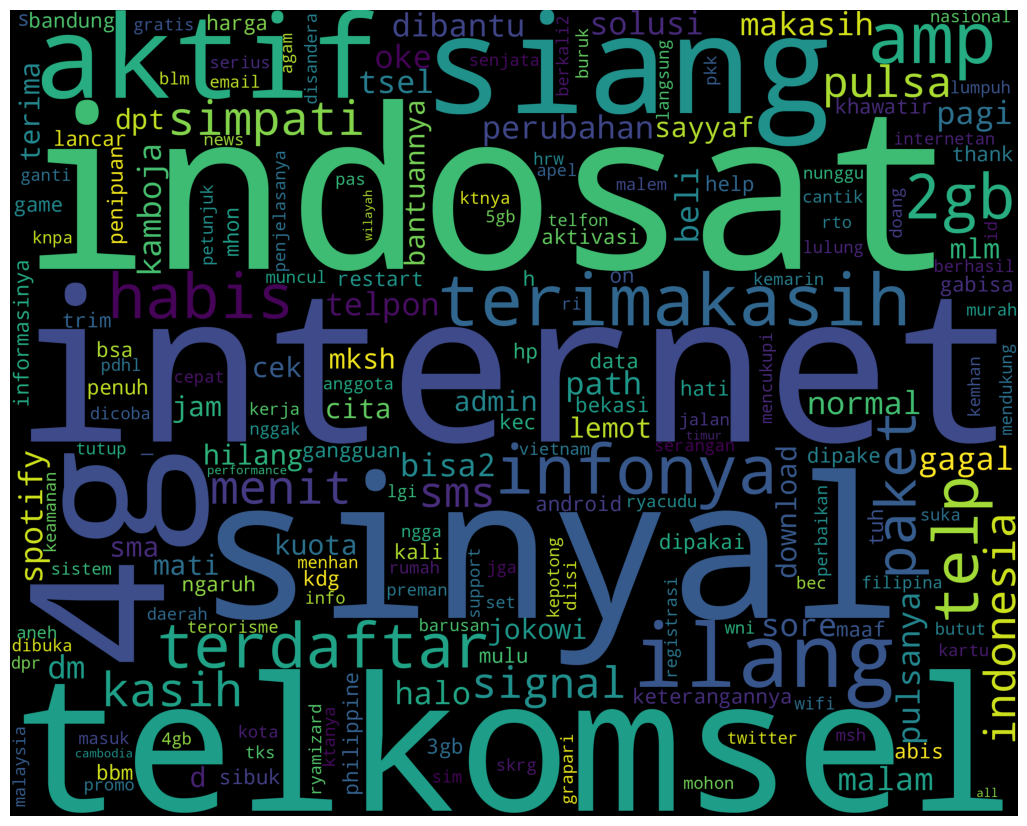

In [ ]:
wordcloud_draw(w_features)

<br>
<br>

## Train The Model

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, training_set))*100)

Naive Bayes Algo accuracy percent: 93.12169312169311


<br>
<br>

## Test The Model

Test Classifier Using Test Dataset

In [ ]:
test_pos = test[ test['sentiment'] == 'Positif']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negatif']
test_neg = test_neg['text']

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negatif'):
        neg_cnt = neg_cnt + 1
        #print(obj.split())
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positif'):
        pos_cnt = pos_cnt + 1

print('[Negatif]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positif]: %s/%s '  % (len(test_pos),pos_cnt))

[Negatif]: 257/170 
[Positif]: 280/269 


In [ ]:
test_pos.head()

3303                                                           Gerakan Bela Negara Akan Gelar Simposium Anti PKI 
95                                                                              ok trimaksih infonya @IndosatCare
3282    Bela Negara adalah sikap dan perilaku warga negara yang dijiwai oleh kecintaannya kepada Negara Kesatuan 
3063                                        Berita  News   Kemenhan Ingin Punya Intelijen  Ini Kata Panglima TNI 
3539             Saya suka video   a  Uji Coba Drone OS Wifanusa Pesanan Kemenhan  Waduk Jatiluhur       Mei     
Name: text, dtype: object

In [ ]:
test_neg.head()

4042                                                                                                 Menhan: Goblok Kalau Teroris Masuk Surga
1837                                                                                  @telkomsel waduh mas mahal amat, gak ada yang lbh murah
1823    @indosatcare area superwifi hanya ada di tempat2 tertentu, tapi paket superwifi berlaku untuk semua, ya ga kepake lah itu kuota! fck!
1501                                     @IndosatCare sudah daftar paket superinternet tpi sudah beberapa jam tidak  ada balasan dikonfirmasi
2103                                                                                      Oknum TNI Pengedar Uang Palsu Berdinas di Kemenhan 
Name: text, dtype: object

In [ ]:
tweets_test = []
#stopwords_set = set(stopwords.words("indonesia"))

for index, row in test.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets_test.append((words_cleaned,row.sentiment))

test_set = nltk.classify.apply_features(extract_features, tweets_test)

In [ ]:
print("Naive Bayes Algo accuracy on test percent:", (nltk.classify.accuracy(classifier, test_set))*100)

Naive Bayes Algo accuracy on test percent: 55.9953434225844


Feature

In [ ]:
len(w_features)

5045

In [ ]:
w_features

dict_keys(['mang', 'itu', 'paket', 'super', 'murah', 'sluruh', 'pengguna', 'simpati', 'yaa.', 'aneh', 'berlatih', 'kungfu', 'brarti', 'ikut', 'bertanggung', 'jawab', 'bela', 'negara', 'bukan', 'saling', 'membunuh', 'sesama', 'sodara', 'ikspi', 'densus', 'independent', 'anticapitalism', 'baik', 'admim', 'yang', 'cantik', ':-d', 'panglima', 'tni', 'hadiri', 'apel', 'gelar', 'nasional', 'bisniscom', 'kodam', 'udayana', 'prioritaskan', 'pelajar', 'ormas', 'utm', 'source', 'dlvr', 'medium', 'twitter', 'ganti', 'pemimpin', 'juga', 'bakal', 'gitu', 'cita', 'awal', 'kemerdekaan', 'sudah', 'hilang', 'aduh,', 'narkoba', 'lagi', 'ryamizard:', 'bebaskan', 'wni,', 'duterte', 'pimpin', 'serang', 'abu', 'sayyaf', 'masih', 'blm', 'ada', 'pengumuman', 'katanya', 'hari', 'ini.', 'ekonomi', 'kemenhan', 'kebutuhan', 'bandan', 'intelijen', 'pertahanan', 'sangat', 'penting', 'hrw', 'anggap', 'pemerintah', 'picu', 'serangan', 'terhadap', 'kaum', 'lgbt', 'harus', 'kaya', 'tiap', 'menit', 'rto', 'terus.', 'pad

In [ ]:
nltk.FreqDist(get_words_in_tweets(tweets))

FreqDist({'negara': 438, 'bela': 400, 'kemenhan': 366, 'saya': 279, 'menhan': 196, 'dan': 193, 'ada': 189, 'pertahanan': 168, 'bisa': 166, 'tni': 162, ...})

Test Classifier

In [ ]:
pred =  classifier.classify(extract_features(['oke', 'nasional', 'banget', 'paket', 'pulsa']))
pred

'Negatif'

In [ ]:
classifier.show_most_informative_features(20)

Most Informative Features
        containts(paket) = True           Negati : Positi =     33.8 : 1.0
          containts(ya?) = True           Negati : Positi =     27.7 : 1.0
        containts(pulsa) = True           Negati : Positi =     25.8 : 1.0
       containts(sinyal) = True           Negati : Positi =     22.9 : 1.0
     containts(jaringan) = True           Negati : Positi =     22.1 : 1.0
     containts(panglima) = True           Positi : Negati =     20.8 : 1.0
          containts(oke) = True           Positi : Negati =     19.4 : 1.0
     containts(nasional) = True           Positi : Negati =     16.7 : 1.0
        containts(empat) = True           Positi : Negati =     16.2 : 1.0
          containts(kok) = True           Negati : Positi =     13.8 : 1.0
       containts(tolong) = True           Negati : Positi =     12.8 : 1.0
        containts(nomor) = True           Negati : Positi =     12.4 : 1.0
        containts(intel) = True           Positi : Negati =     12.4 : 1.0

Data menunjukkan rasio kemunculan negatif dan positif, atau sebaliknya, untuk setiap kata. Kita dapat melihat bahwa kata "paket" muncul 53.2 kali lebih sering dalam sentimen negatif dibandingkan dalam sentimen positif.

<br>
<br>

## Save and Reload The Model

In [ ]:
#To save the trained claassifier, do the following
import pickle
f = open('my_classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [ ]:
#To reload it:
f = open('my_classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()

In [ ]:
pred = classifier.classify(extract_features(['makasih', 'sinyal', 'banget']))
pred

'Negatif'

<br>
<br>

**Revision History:**

Release: 1.2102.0601
*   First release

Release: 1.2402.0601
*   Tidy up the code
